## Laboratorium 5 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN. Wyswietl tablice pomylek.

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [34]:
import numpy as np


with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [265]:
def covariance_matrix(X):
    # Obliczanie sredniej kazdej cechy
    means = np.mean(X, axis=0)
    # Wzor na macierz kowariancji
    return ((X-means).T @ (X-means)) / (len(X) - 1) , means

In [266]:
cov_matrix_1, means = covariance_matrix(train)
cov_matrix_2 = np.cov(train, rowvar=False)

print(f'Zaimplementowana macierz: \n{cov_matrix_1}\n\nNumpy macierz: \n{cov_matrix_2}')

Zaimplementowana macierz: 
[[ 1.20768640e+02  2.89056149e-01  4.20563421e-01  1.07631965e+01
   3.83890520e-01  1.70305293e-01  1.26784796e-01 -1.38913941e-01
  -1.27342816e-02  1.81191997e-01 -1.36667620e-02 -2.77427906e-02
  -1.91960639e-03 -2.32652690e-04  2.30242762e-04 -8.17296004e-01]
 [ 2.89056149e-01  1.25774042e+01 -3.06926758e-02  3.01218581e-01
  -2.28241586e-02 -2.19969509e-02  3.16915039e-02  1.05683577e-02
   4.23475297e-03  8.31728117e-02 -4.39327507e-04 -1.72733266e-03
   3.43166848e-04 -5.30274475e-05 -3.20230191e-05 -5.70790720e-02]
 [ 4.20563421e-01 -3.06926758e-02  4.41312587e-02  3.12923952e-01
   2.58353712e-02  5.66027989e-03  6.94997381e-03 -5.77038418e-03
  -1.06746628e-03 -1.63121947e-02 -1.61771175e-03 -2.10090985e-03
  -5.10696876e-04 -1.46083941e-04 -2.06612127e-05 -2.94664526e-02]
 [ 1.07631965e+01  3.01218581e-01  3.12923952e-01  7.98070167e+00
   3.95357657e-01 -2.59826390e-02  1.30983043e-02 -3.21130411e-01
   2.13973257e-02  7.39677092e-01 -3.06141705e

In [90]:
def edist(x, y, features):
    # Wzor na odleglosc Euklidesa
    return sum([ (x[i] - y[i]) ** 2 for i in features])**0.5

In [244]:
def mdist(x, mean, cov):
    # Obliczenie popszczegolnych czesci wzoru
    diff = x - mean
    cov_inv = np.linalg.inv(cov)
    # Ostateczny wzor na odleglosc Machalanobisa
    distance = (diff.T @ cov_inv @ diff) ** 0.5
    return distance


def NM(X_train, X_test, classes):
    predictions = []
    means = []
    cov = []

    for clas in classes:
        # Podzial zbioru ze wzgledu na klasy
        X_class = X_train[np.isin(X_train[:, 0], clas)]
        # Srednie poszczegolnych klas
        means.append(np.mean(X_class, axis=0))
    # Wspolna macierz kowariancji dla wszystkich klas. Dla pojedynczych klas det = 0, poniewaz 1 kolumna byla zerami
    cov = (np.cov(X_train, rowvar=False))
        
    for X in X_test:
        min_dist = float('inf')
        predicted_class = None

        for j in range(len(means)):
            # Obliczanie odleglosci
            distance = mdist(X, means[j], cov)
            # Sprawdzanie czy odleglosc jest mniejsza od poprzedniej
            if distance < min_dist:
                min_dist = distance
                predicted_class = float(classes[j])

        predictions.append(predicted_class)
    return np.array(predictions)

Dokladnosc NM: 0.8945454545454545
Dokladnosc NN: 0.8363636363636363


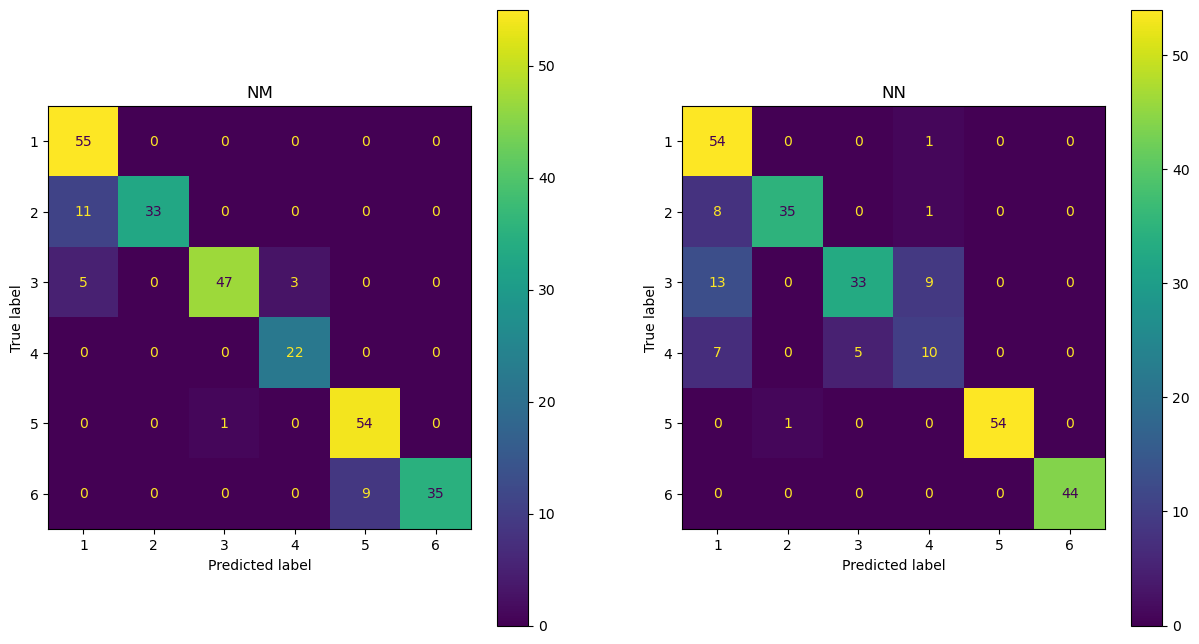

In [282]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = [1, 2, 3, 4, 5, 6]

X_train = train[np.isin(train[:, 0], classes)]
X_test = test[np.isin(test[:, 0], classes)]

y_true = X_test[:,0]

# Wywolanie metody NM ktora zwraca predykcje na algorytmu NM
pred_nm = NM(X_train, X_test, classes)


# Algorytm NN
pred_nn = []
features = range(2,16)
for element in X_test:
    klasyfikator = [edist(element, cecha, features) for cecha in X_train]
    pred_nn.append(X_train[klasyfikator.index(min(klasyfikator))][0])

_, axs = plt.subplots(1, 2, figsize=(15, 8))

# Dokladnosci metod oraz macierz pomylek
accuracy_nm = accuracy_score(y_true, pred_nm)
c_nm = confusion_matrix(y_true, pred_nm)
disp_nm = ConfusionMatrixDisplay(confusion_matrix=c_nm, display_labels=classes)

disp_nm.plot(ax=axs[0])
axs[0].set_title('NM')
print(f'Dokladnosc NM: {accuracy_nm}')


accuracy_nn = accuracy_score(y_true, pred_nn)
c_nn = confusion_matrix(y_true, pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=c_nn, display_labels=classes)

disp_nn.plot(ax=axs[1])
axs[1].set_title('NN')
print(f'Dokladnosc NN: {accuracy_nn}')